In [1]:
# Title:  Solution: Decomposition

# INSTALL AND LOAD PACKAGES ################################

# Install pacman if you don't have it (uncomment next line)
# install.packages("pacman")

# Install and/or load packages with pacman
pacman::p_load(  # Use p_load function from pacman
  changepoint,   # Changepoint analysis
  datasets,      # R's built-in sample datasets
  magrittr,      # Pipes
  pacman,        # Load/unload packages
  rio,           # Import/export data
  tidyverse      # So many reasons
)

In [2]:
# LOAD AND PREPARE DATA ####################################

# Use `EuStockMarkets` data from R's `datasets` package.
# This data gives the daily closing prices of major European
# stock indices: Germany's DAX (Ibis), Switzerland's SMI,
# France's CAC, and the UK's FTSE.

# Get info on the dataset
?EuStockMarkets

EuStockMarkets {datasets},R Documentation


In [3]:
# See the data (with decimal dates)
EuStockMarkets

,DAX,SMI,CAC,FTSE
1991.496,1628.75,1678.1,1772.8,2443.6
1991.500,1613.63,1688.5,1750.5,2460.2
1991.504,1606.51,1678.6,1718.0,2448.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.512,1618.16,1686.6,1723.1,2484.7
1991.515,1610.61,1671.6,1714.3,2466.8
1991.519,1630.75,1682.9,1734.5,2487.9
1991.523,1640.17,1703.6,1757.4,2508.4
1991.527,1635.47,1697.5,1754.0,2510.5
1991.531,1645.89,1716.3,1754.3,2497.4


In [4]:
# Decomposition is easiest with just one time series, so
# we'll focus on France's CAC ("Cotation Assistée en
# Continu" or "continuous assisted trading"). We'll select
# that one time series and save it to `df`, which allows
# code to be reused
df <- EuStockMarkets[, 3]  # This selects the third series

In [5]:
# EXPLORE DATA #############################################

# See the time series
df

A Time Series:
   [1] 1772.8 1750.5 1718.0 1708.1 1723.1 1714.3 1734.5 1757.4 1754.0 1754.3
  [11] 1759.8 1755.5 1758.1 1757.5 1763.5 1762.8 1768.9 1778.1 1780.1 1767.7
  [21] 1757.9 1756.6 1754.7 1766.8 1766.5 1762.2 1759.5 1782.4 1789.5 1783.5
  [31] 1780.4 1808.8 1820.3 1820.3 1820.3 1687.5 1725.6 1792.9 1819.1 1833.5
  [41] 1853.4 1849.7 1851.8 1857.7 1864.3 1863.5 1873.2 1860.8 1868.7 1860.4
  [51] 1855.9 1840.5 1842.6 1861.2 1876.2 1878.3 1878.4 1869.4 1880.4 1885.5
  [61] 1888.4 1885.2 1877.9 1876.5 1883.8 1880.6 1887.4 1878.3 1867.1 1851.9
  [71] 1843.6 1848.1 1843.4 1843.6 1833.8 1833.4 1856.9 1863.4 1855.5 1864.2
  [81] 1846.0 1836.8 1830.4 1831.6 1834.8 1852.1 1849.8 1861.8 1856.7 1856.7
  [91] 1841.5 1846.9 1836.1 1838.6 1857.6 1857.6 1858.4 1846.8 1868.5 1863.2
 [101] 1808.3 1765.1 1763.5 1766.0 1741.3 1743.3 1769.0 1757.9 1754.9 1739.7
 [111] 1708.8 1722.2 1713.9 1703.2 1685.7 1663.4 1636.9 1645.6 1671.6 1688.3
 [121] 1696.8 1711.7 1706.2 1684.2 1648.5 1633.6 1699.1 1699.1 1722.5 1720.7
 [131] 1741.9 1765.7 1765.7 1749.9 1770.3 1787.6 1778.7 1785.6 1833.9 1837.4
 [141] 1824.3 1843.8 1873.6 1860.2 1860.2 1865.9 1867.9 1841.3 1838.7 1849.9
 [151] 1869.3 1890.6 1879.6 1873.9 1875.3 1857.0 1856.5 1865.8 1860.6 1861.6
 [161] 1865.6 1864.1 1861.6 1876.5 1865.1 1882.1 1912.2 1915.4 1951.2 1962.4
 [171] 1976.5 1953.5 1981.3 1985.1 1983.4 1979.7 1983.8 1988.1 1973.0 1966.9
 [181] 1976.3 1993.9 1968.0 1941.8 1947.1 1929.2 1943.6 1928.2 1922.0 1919.1
 [191] 1884.6 1896.3 1928.3 1934.8 1923.5 1943.8 1942.4 1928.1 1942.0 1942.7
 [201] 1974.8 1975.4 1907.5 1943.6 1974.1 1963.3 1972.3 1990.7 1978.2 1978.2
 [211] 1978.2 1980.4 1983.7 1978.1 1984.9 1995.7 2006.6 2036.7 2031.1 2031.1
 [221] 2041.6 2046.9 2047.2 2063.4 2063.4 2077.5 2063.6 2053.2 2017.0 2024.0
 [231] 2051.6 2023.1 2030.8 2016.8 2045.1 2046.3 2029.6 2014.1 2014.1 2033.3
 [241] 2017.4 2024.9 1992.6 1994.9 1981.6 1981.6 1962.2 1953.7 1928.8 1928.3
 [251] 1918.1 1931.4 1908.8 1891.8 1913.9 1885.8 1895.8 1899.6 1920.3 1915.3
 [261] 1907.3 1900.6 1880.9 1873.5 1883.6 1868.5 1879.1 1847.8 1861.8 1859.4
 [271] 1859.4 1859.4 1853.3 1851.2 1801.8 1767.9 1762.7 1727.5 1734.6 1734.6
 [281] 1755.4 1769.0 1801.6 1782.6 1754.7 1784.4 1787.6 1798.0 1793.8 1777.3
 [291] 1755.2 1737.8 1730.1 1722.4 1753.5 1757.3 1736.7 1734.2 1724.2 1744.2
 [301] 1689.7 1667.7 1667.8 1687.6 1687.5 1684.9 1674.2 1711.4 1780.5 1779.0
 [311] 1779.3 1763.7 1756.8 1774.2 1802.0 1873.6 1836.2 1859.8 1852.7 1882.9
 [321] 1826.1 1832.8 1828.9 1829.5 1843.5 1770.3 1731.9 1736.7 1724.0 1683.3
 [331] 1611.0 1612.5 1654.2 1673.9 1657.3 1655.1 1685.1 1667.9 1650.0 1664.2
 [341] 1679.1 1731.3 1722.2 1730.7 1766.4 1770.7 1774.5 1749.9 1730.9 1742.4
 [351] 1742.4 1786.9 1804.1 1804.7 1793.6 1786.7 1798.5 1798.5 1821.5 1796.8
 [361] 1772.7 1764.4 1759.2 1722.3 1724.2 1674.8 1720.6 1721.0 1739.7 1749.7
 [371] 1771.4 1792.3 1783.3 1799.4 1781.7 1788.6 1765.9 1791.2 1769.5 1758.7
 [381] 1738.3 1744.8 1736.7 1735.2 1760.1 1786.3 1824.4 1821.1 1854.6 1854.6
 [391] 1857.5 1870.3 1858.8 1857.8 1857.8 1843.1 1850.8 1859.6 1844.5 1852.6
 [401] 1814.6 1796.8 1782.5 1803.5 1827.1 1837.5 1837.7 1818.8 1812.2 1820.4
 [411] 1779.9 1792.6 1777.4 1780.6 1772.2 1785.9 1787.3 1824.1 1854.4 1908.2
 [421] 1904.7 1894.1 1893.3 1905.6 1912.0 1899.5 1878.2 1905.0 1926.5 1937.2
 [431] 1959.2 1944.1 1953.4 1944.6 1983.7 1998.8 2001.5 1995.2 1986.8 1995.1
 [441] 2004.3 2009.7 1992.4 1988.9 1965.2 1986.0 1975.3 1967.3 1963.5 1962.7
 [451] 1939.3 1952.2 1954.6 2001.4 2025.8 2033.9 2035.9 2031.4 2005.9 1990.8
 [461] 1974.7 1995.3 1984.0 1986.9 1986.9 1986.9 2018.1 2015.4 1988.6 1986.7
 [471] 1968.9 1949.3 1931.9 1944.5 1916.6 1911.6 1927.4 1942.5 1920.6 1939.0
 [481] 1937.0 1923.6 1926.3 1920.5 1878.6 1877.2 1854.5 1872.7 1879.9 1851.7
 [491] 1835.7 1846.4 1836.8 1836.8 1836.8 1861.4 1891.1 1890.4 1904.6 1888.7
 [501] 1888.7 1872.8 1875.8 1867.9 1859.7 1887.9 1893.7 1915.2 1911.2 1920.4
 [511] 1916.8 1897.9 1918.8 1900.3 1910.3 1929.2 1935.3 19

In [6]:
# Get structure of dataset
df %>% str()

 Time-Series [1:1860] from 1991 to 1999: 1773 1750 1718 1708 1723 ...


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'CAC Daily Closing Prices, 1991–1998' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'CAC Daily Closing Prices, 1991–1998' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'CAC Daily Closing Prices, 1991–1998' in 'mbcsToSbcs': dot substituted for <93>”


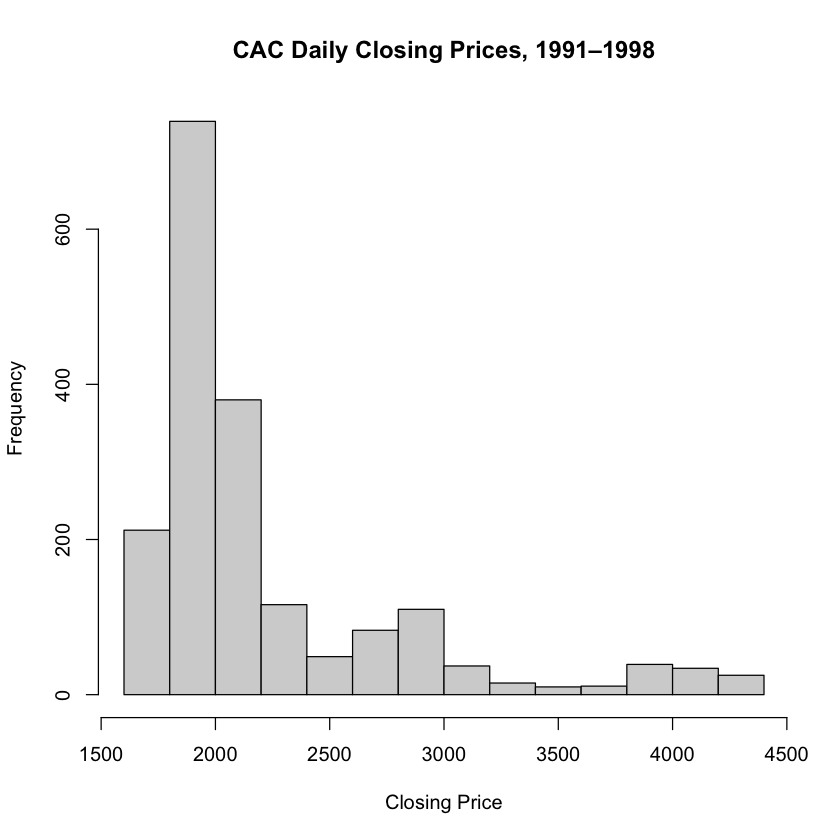

In [7]:
# Histogram of values (ignores time)
df %>% 
  hist(
    main = "CAC Daily Closing Prices, 1991–1998",
    xlab = "Closing Price"
  )

Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'CAC Daily Closing Prices, 1991–1998' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'CAC Daily Closing Prices, 1991–1998' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'CAC Daily Closing Prices, 1991–1998' in 'mbcsToSbcs': dot substituted for <93>”


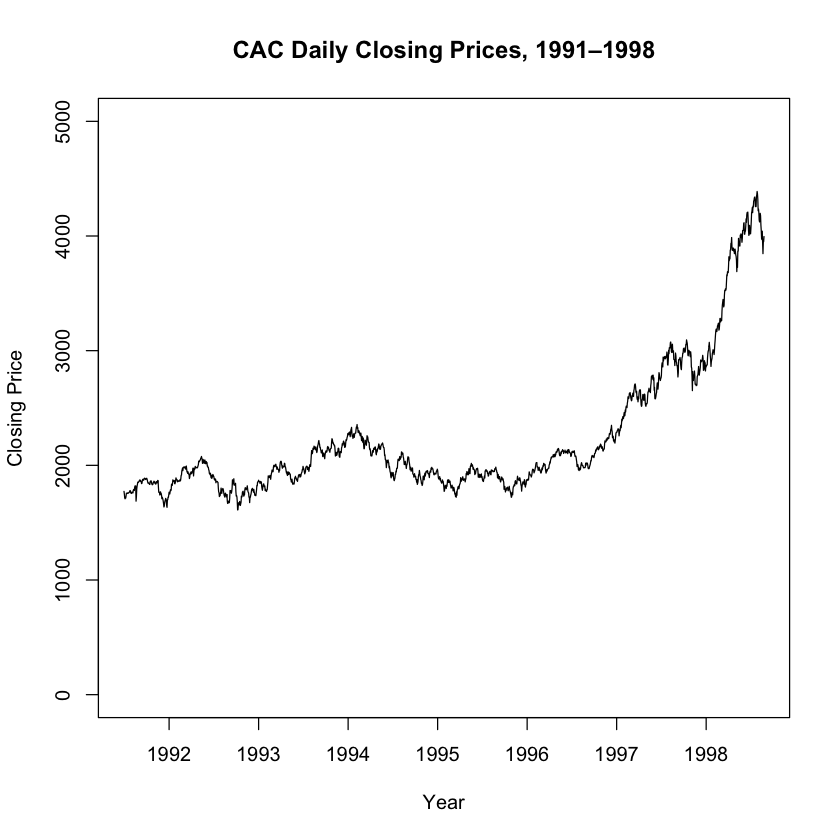

In [8]:
# Plot time series
df %>% 
  plot(
    main = "CAC Daily Closing Prices, 1991–1998",
    xlab = "Year",
    ylab = "Closing Price",
    ylim = c(0, 5000)
  )

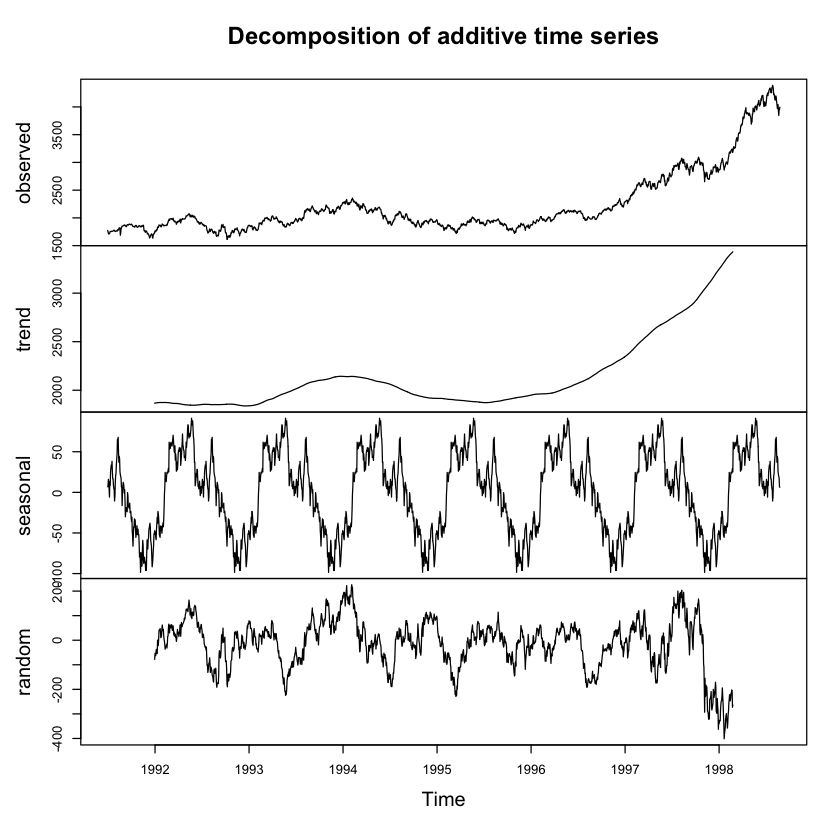

In [9]:
# DECOMPOSE TIME SERIES ####################################

# Uses the `decompose` function from R's built-in `stats`
# package; default method is "additive"
df %>% 
  decompose() %>%
  plot()

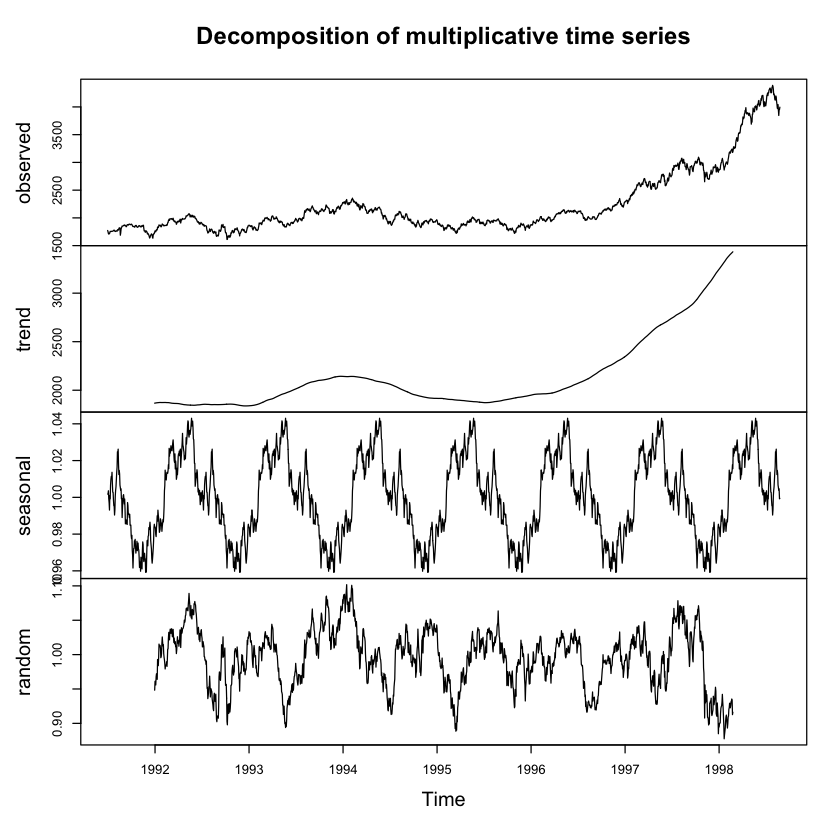

In [10]:
# Can also specify a multiplicative trend, which is good for
# trends that spread over time; the scales for the seasonal
# and random components are now multipliers instead of
# addends.
df %>% 
  decompose(
    type = "multiplicative"
  ) %>%
  plot()

[1] 1997.354

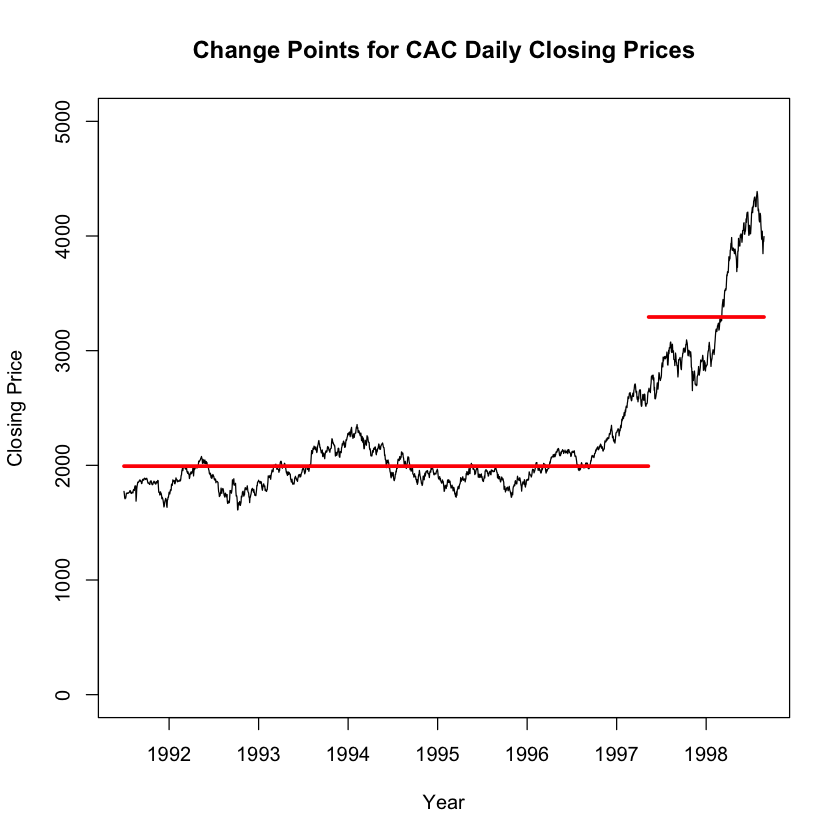

In [11]:
# CHANGEPOINTS ############################################

# Compute and plot time series with change points; can look
# for changepoints in mean using `cpt.mean()`, in variance
# with `cpt.var()`, or both with `cpt.meanvar()`.
df %>%
  cpt.mean(
    test.stat = "Normal"
  ) %T>%                  # T-pipe
  plot(                   # Add change point lines to plot
    cpt.width = 3,        # Line width
    main = "Change Points for CAC Daily Closing Prices",
    xlab = "Year",
    ylab = "Closing Price",
    ylim = c(0, 5000)
  ) %>% 
  cpts.ts()               # Print change point location(s)